In [1]:
!pip install  pydotplus

     |████████████████████████████████| 278 kB 871 kB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=60445db41ccb141314f9fa9c2631e5c47f43e7a6404f9ed055e2c71b80bc126a
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 10000)

/kaggle/input/customer-churn-prediction-2020/sampleSubmission.csv
/kaggle/input/customer-churn-prediction-2020/train.csv
/kaggle/input/customer-churn-prediction-2020/test.csv


In [3]:
df_train=pd.read_csv('/kaggle/input/customer-churn-prediction-2020/train.csv')
df_test=pd.read_csv('/kaggle/input/customer-churn-prediction-2020/test.csv')


In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
set(df_train.dtypes)


{dtype('int64'), dtype('float64'), dtype('O')}

In [8]:
df_train_objects=df_train.select_dtypes(include=['object'])
df_train_objects.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [9]:
df_train_int=df_train.select_dtypes(include=['int64','float64'])
df_train_int.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [10]:
df_train['churn_target']=df_train['churn'].map({"yes":1,'no':0})

In [11]:
df_train_int.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [12]:
x=df_train[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
y=df_train['churn_target']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [13]:
x_test=df_test[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]

In [14]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

## Display Tree 

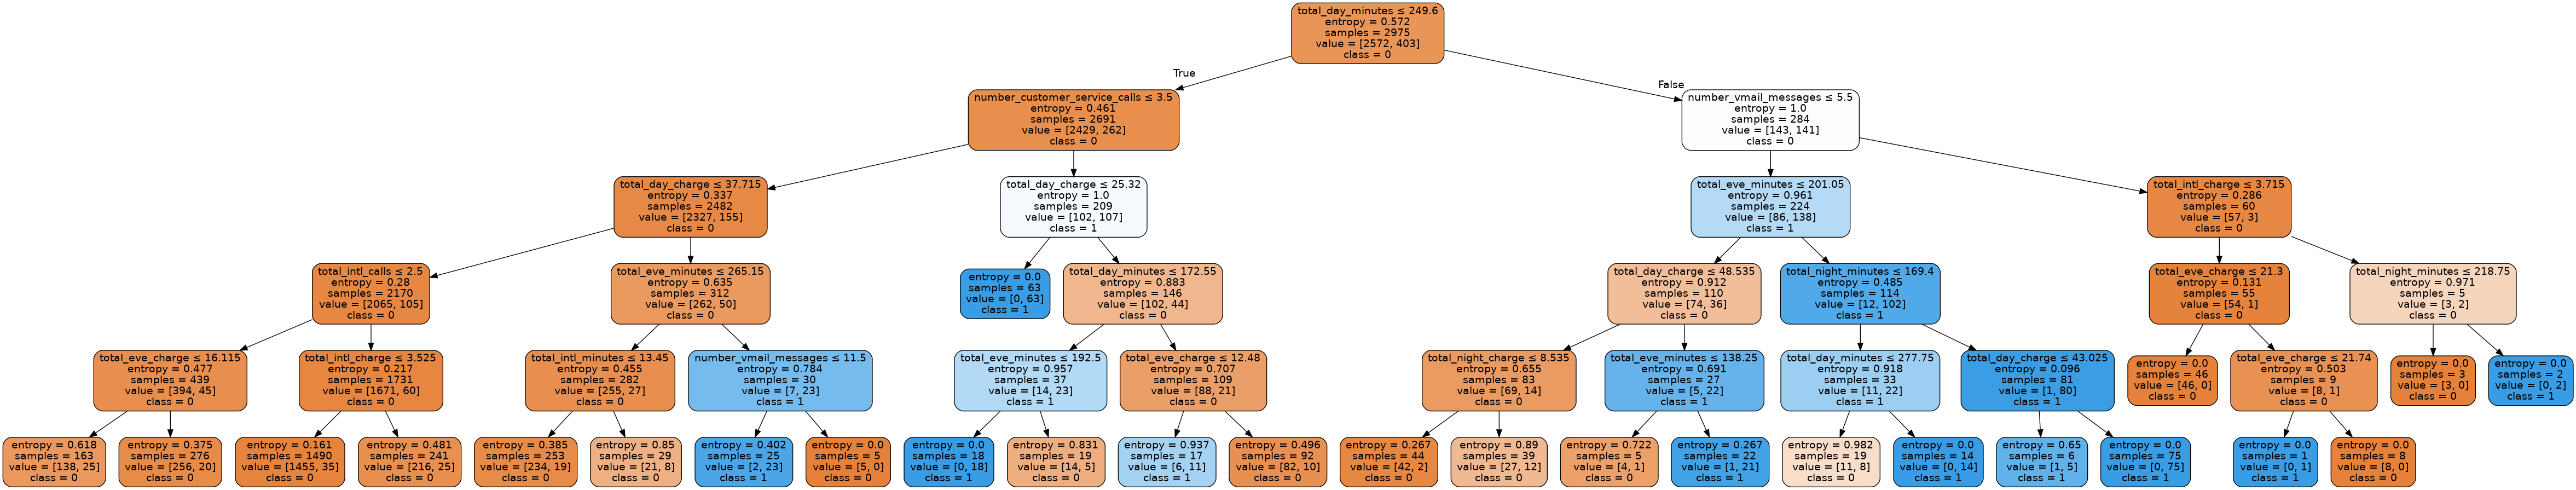

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ChurnPrediction.png')
Image(graph.create_png())

## Model Evaluation

In [16]:
y_pred_proba=clf.predict_proba(X_test)[::,1]

In [17]:
metrics.accuracy_score(Y_test,y_pred)

0.912156862745098

In [18]:
rocaucscore=metrics.roc_auc_score(Y_test,y_pred_proba)
print(rocaucscore)

0.861659544159544


In [19]:
metrics.confusion_matrix(Y_test,y_pred)

array([[1064,   16],
       [  96,   99]])

In [20]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1080
           1       0.86      0.51      0.64       195

    accuracy                           0.91      1275
   macro avg       0.89      0.75      0.79      1275
weighted avg       0.91      0.91      0.90      1275



In [21]:
pre,recal,_=metrics.roc_curve(Y_test,y_pred_proba)

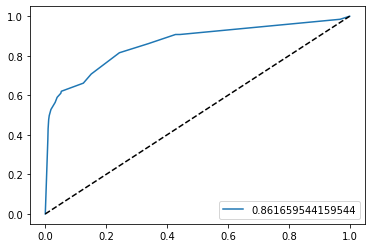

In [22]:
plt.plot(pre,recal,label=rocaucscore)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)